<a href="https://colab.research.google.com/github/Pearlkakande/machinelearning/blob/EDA/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages (if not already installed)
!pip install datasets
!pip install wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from wordcloud import WordCloud, STOPWORDS

# Set plot aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset from Hugging Face
dataset = load_dataset("Eitanli/goodreads", split="train")

# Convert to a pandas DataFrame for easier analysis
df = pd.DataFrame(dataset)
print("Dataset shape:", df.shape)
df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whic

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/737 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


goodreads_data.csv:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset shape: (10000, 8)


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [ ]:
# Data summary and info
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB
None
         Unnamed: 0                                      Book        Author  \
count   10000.00000                                     10000         10000   
unique          NaN                                      9871          6064   
top             NaN  The Oldest Dance (Wisdom Revolution, #2)  Stephen King   
freq            NaN                                         4            57   
mean     

In [ ]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64


Coverting Num_Ratings into integer type for data manipulation to see possible cold start candidates among the books

In [ ]:
print(df.columns.tolist())
# Clean and convert "Num_Ratings" to integer
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '').astype(int)

# Now filter cold-start candidates
cold_start_books = df[df['Num_Ratings'] < 10]  # Works now!
print(f"Cold-start candidates: {len(cold_start_books)}")

# Analyze metadata
print("\nCold-start book examples:")
print(cold_start_books[['Book', 'Author', 'Genres', 'Avg_Rating']].head(5))

['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating', 'Num_Ratings', 'URL']
Cold-start candidates: 443

Cold-start book examples:
                                                   Book  \
3397                               Legacy of the Unsung   
3715      How the War Started (How the War Started, #1)   
3721          Home Made Pirates - A Story from the Seas   
3737  Joey Wheeler: The Official Character & Monster...   
3747     Broken: The Failed Promise of Muslim Inclusion   

                     Author Genres  Avg_Rating  
3397          Gary D. Henry     []        4.11  
3715           Alice Rhodes     []        4.00  
3721            Adnan Aslam     []        4.78  
3737  Arthur "Sam" Murakami     []        5.00  
3747       Evelyn Alsultany     []        0.00  


Distribution of average ratings

This histogram (with a KDE overlay) shows how ratings are distributed. It helps us check if ratings are skewed and whether there are any outliers—important for understanding collaborative signals used in our teacher model


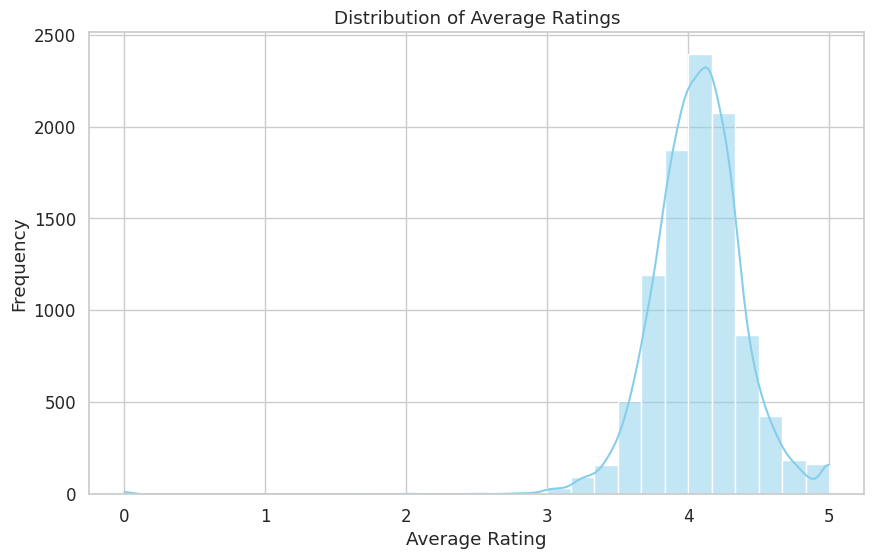

In [ ]:
plt.figure()
sns.histplot(df['Avg_Rating'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()


 Box Plot of Average Ratings

A box plot reveals the median, quartiles, and any outliers. This insight is useful to understand the central tendency of ratings and potential data anomalies.

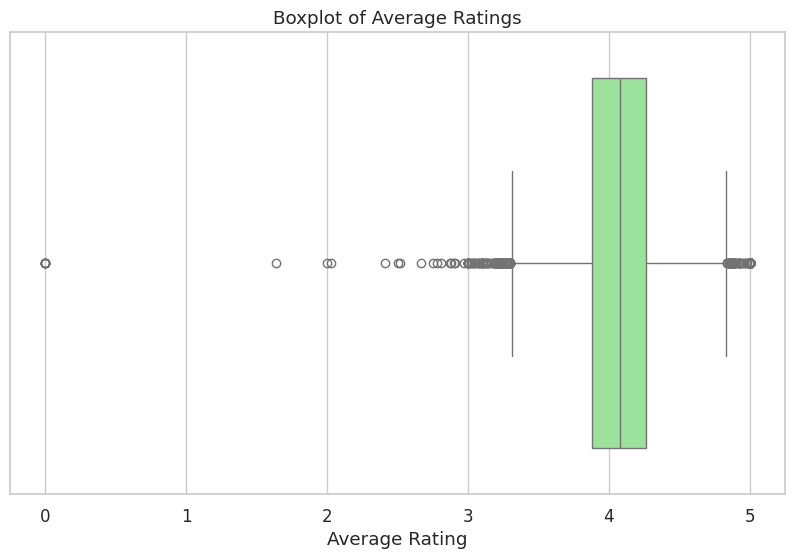

In [ ]:
plt.figure()
sns.boxplot(x=df['Avg_Rating'], color='lightgreen')
plt.title("Boxplot of Average Ratings")
plt.xlabel("Average Rating")
plt.show()


Word Cloud for Book Descriptions

A word cloud provides a visual summary of the most frequent terms in the descriptions. This is important to check that key themes are present and to guide text preprocessing for feature extraction

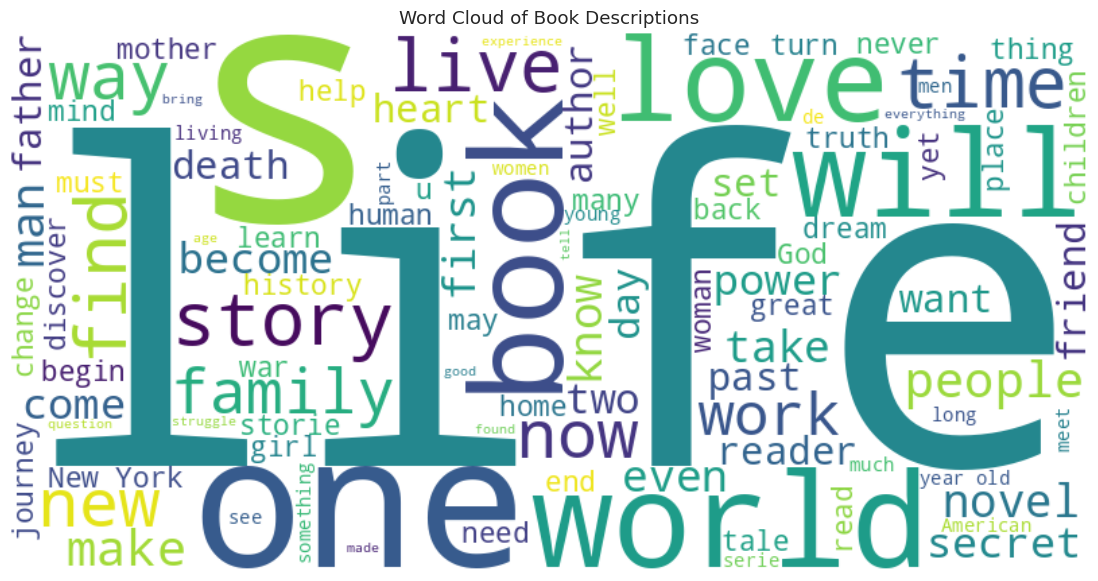

In [ ]:
# Combine all descriptions into one string
text = " ".join(desc for desc in df['Description'].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width=800, height=400).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Book Descriptions")
plt.show()


Top 20 Genres Frequency

Understanding genre distribution helps identify popular genres and informs both collaborative and content-based filtering components of our model

<ipython-input-10-e654a2de2375>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genres.head(20), x='Count', y='Genre', palette='viridis')


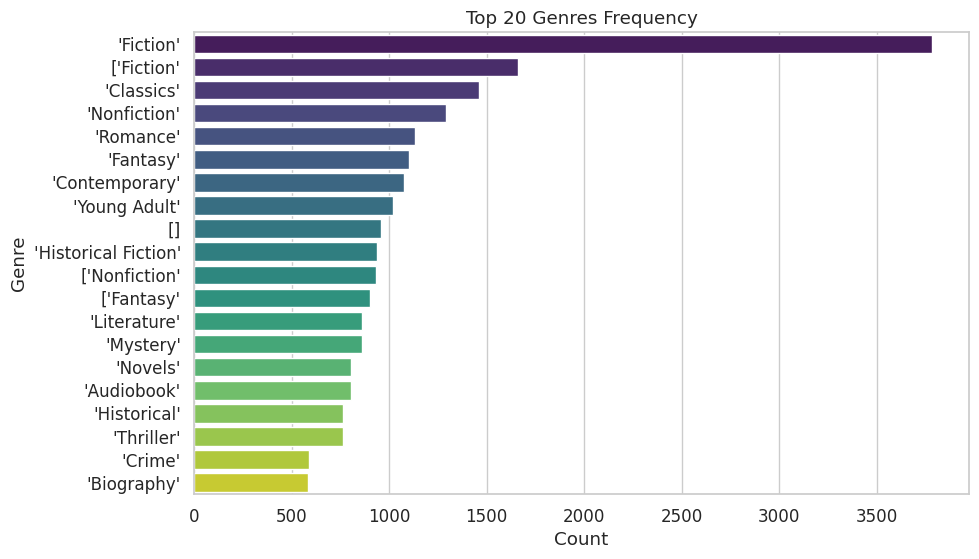

In [ ]:
# Split genres by comma and explode the column into multiple rows to tell the exact genres present.
df_genres = df['Genres'].str.split(',', expand=True).stack().reset_index(drop=True)
df_genres = df_genres.str.strip().value_counts().reset_index()
df_genres.columns = ['Genre', 'Count']

plt.figure()
sns.barplot(data=df_genres.head(20), x='Count', y='Genre', palette='viridis')
plt.title("Top 20 Genres Frequency")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


Top 20 Authors by Number of Books

This visualization shows which authors are most represented. For recommendation systems, popular authors may have more robust interaction data (warm items), which is useful in training the teacher model.

<ipython-input-11-c2cd98fa3b31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')


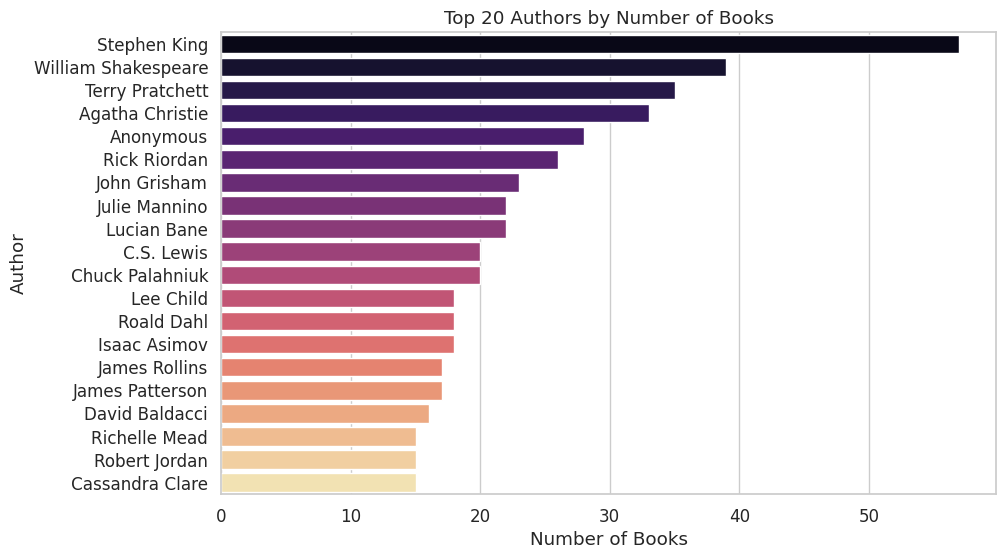

In [ ]:
plt.figure()
top_authors = df['Author'].value_counts().head(20)
sns.barplot(x=top_authors.values, y=top_authors.index, palette='magma')
plt.title("Top 20 Authors by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()


Average Rating by Top Authors

It’s useful to know which authors tend to produce higher-rated books. This can offer insight into potential biases in ratings that might be distilled into the teacher model.

<ipython-input-12-7f9fe9761d17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=author_ratings.head(20), x='Avg_Rating', y='Author', palette='coolwarm')


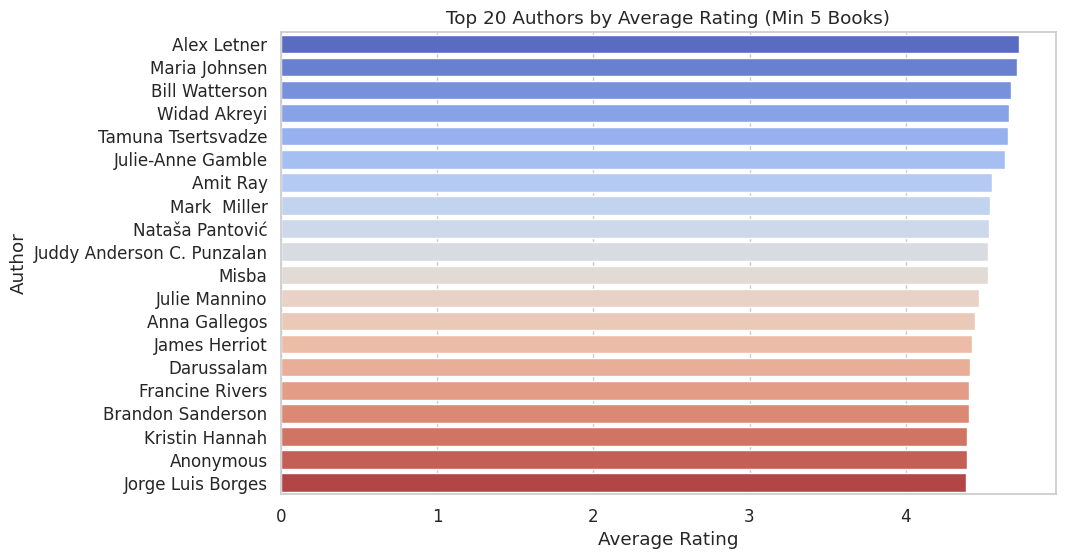

In [ ]:
# Compute average rating for authors with at least 5 books (to reduce noise)
author_ratings = df.groupby('Author').agg({'Avg_Rating': 'mean', 'Book': 'count'}).reset_index()
author_ratings = author_ratings[author_ratings['Book'] >= 5].sort_values(by='Avg_Rating', ascending=False)

plt.figure()
sns.barplot(data=author_ratings.head(20), x='Avg_Rating', y='Author', palette='coolwarm')
plt.title("Top 20 Authors by Average Rating (Min 5 Books)")
plt.xlabel("Average Rating")
plt.ylabel("Author")
plt.show()


Distribution of Book Title Lengths

Title length might correlate with certain genres or types of books. It’s an additional content feature that could be used in feature learning.

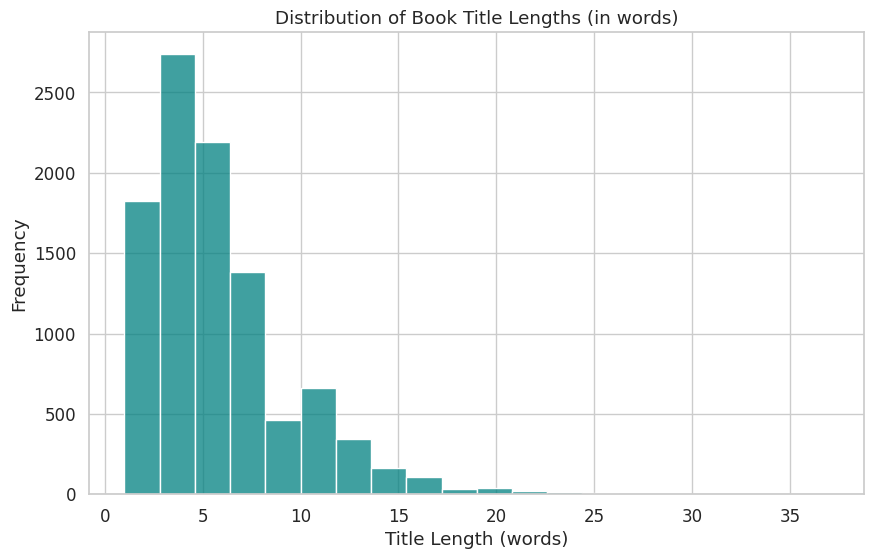

In [ ]:
# Create a new column with title lengths (in words)
df['Title_Length'] = df['Book'].apply(lambda x: len(x.split()))
plt.figure()
sns.histplot(df['Title_Length'], bins=20, color='teal')
plt.title("Distribution of Book Title Lengths (in words)")
plt.xlabel("Title Length (words)")
plt.ylabel("Frequency")
plt.show()



Word Cloud for Book Titles

This word cloud reveals the most common words used in book titles. It can help in understanding trends and in preprocessing (e.g., identifying stopwords or common terms) for our feature learning

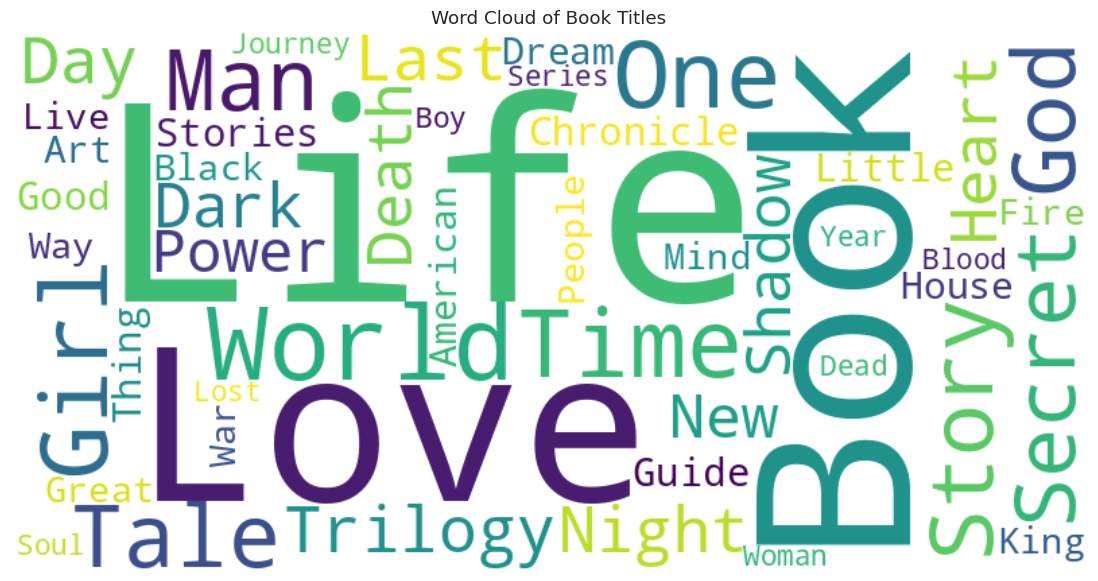

In [ ]:
# Combine all book titles into one string
titles_text = " ".join(df['Book'].astype(str))
title_wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50, width=800, height=400).generate(titles_text)

plt.figure(figsize=(15, 7))
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Book Titles")
plt.show()


Correlation Heatmap Among Numerical Features

We will compute the correlation between features such as Avg_Rating, Num_Ratings, Description_Length, and Title_Length.

A correlation heatmap helps to understand relationships between numeric variables. For our model, it is useful to know if, for instance, more-rated books tend to have higher or lower average ratings, or if description length is related to ratings

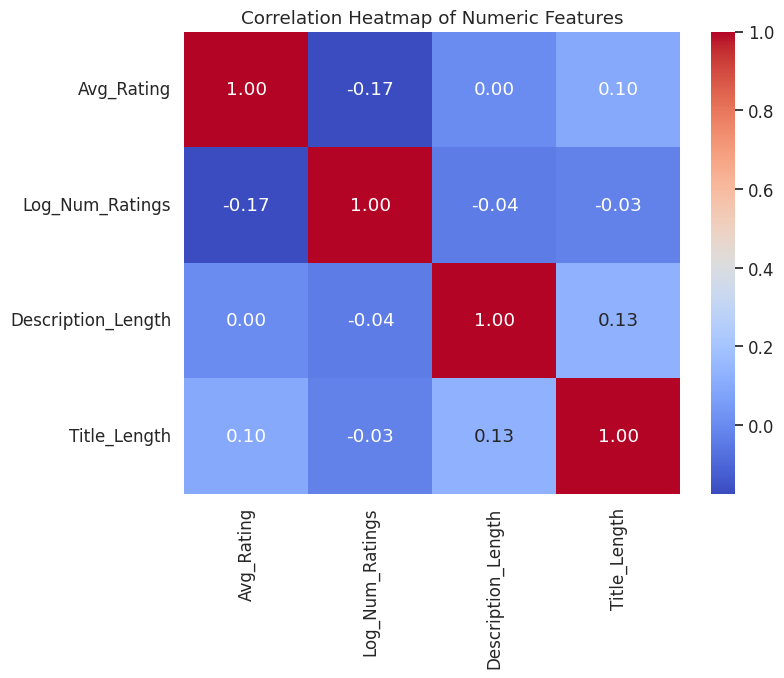

In [ ]:
# Calculate the description length: count of words in each description
df['Description_Length'] = df['Description'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# (Optional) Create Title_Length if not already present
df['Title_Length'] = df['Book'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Convert 'Num_Ratings' to numeric if it is not already, and create a log-transformed version to mitigate skewness.
df['Num_Ratings'] = pd.to_numeric(df['Num_Ratings'], errors='coerce')
df['Log_Num_Ratings'] = np.log1p(df['Num_Ratings'])

# Select the numeric columns for correlation analysis.
# We include Average Rating, log-transformed number of ratings, description length, and title length.
numeric_cols = ['Avg_Rating', 'Log_Num_Ratings', 'Description_Length', 'Title_Length']

# Compute the correlation matrix for these features
corr = df[numeric_cols].corr()

# Plot the correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Average Rating by Genre

To understand how different genres perform, we need to “explode” the genres column and then compute the average rating per genre

Different genres may inherently have different rating trends. Understanding these differences can help tailor the feature learning and normalization steps in our model


<ipython-input-20-1afa99a4487c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_rating.head(20), x='Avg_Rating', y='Genres', palette='Spectral')


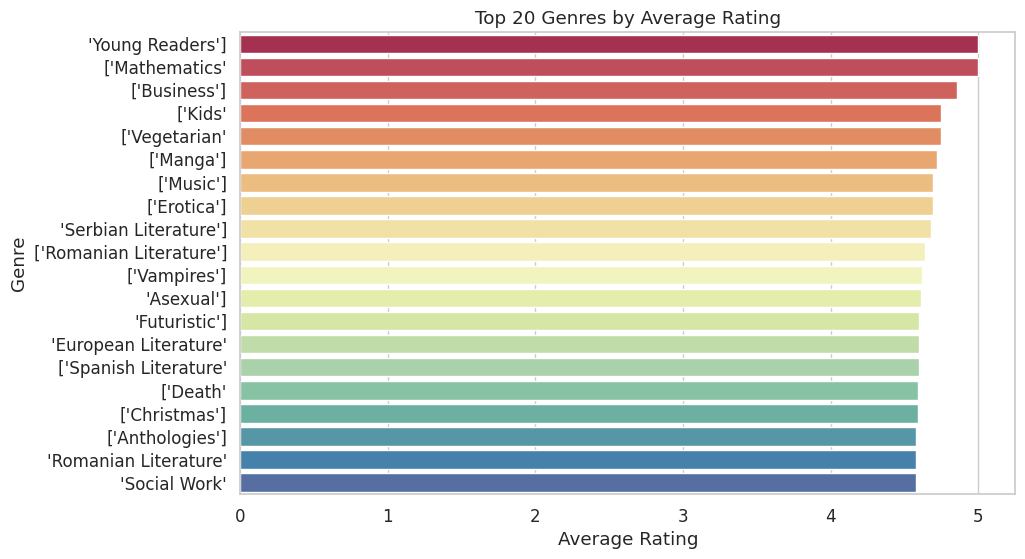

In [ ]:
# Explode genres into separate rows
df_exploded = df.copy()
df_exploded['Genres'] = df_exploded['Genres'].str.split(',')
df_exploded = df_exploded.explode('Genres')
df_exploded['Genres'] = df_exploded['Genres'].str.strip()

# Group by genre and compute average rating
genre_rating = df_exploded.groupby('Genres')['Avg_Rating'].mean().reset_index().sort_values(by='Avg_Rating', ascending=False)

plt.figure()
sns.barplot(data=genre_rating.head(20), x='Avg_Rating', y='Genres', palette='Spectral')
plt.title("Top 20 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()


Count Plot of Books per Genre

This plot shows which genres are most represented in the dataset. It is crucial for understanding data imbalance—information that is especially useful when designing a graph-based model that must cope with cold start scenarios

<ipython-input-21-799d736d1853>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_count.head(20), x='Count', y='Genre', palette='cubehelix')


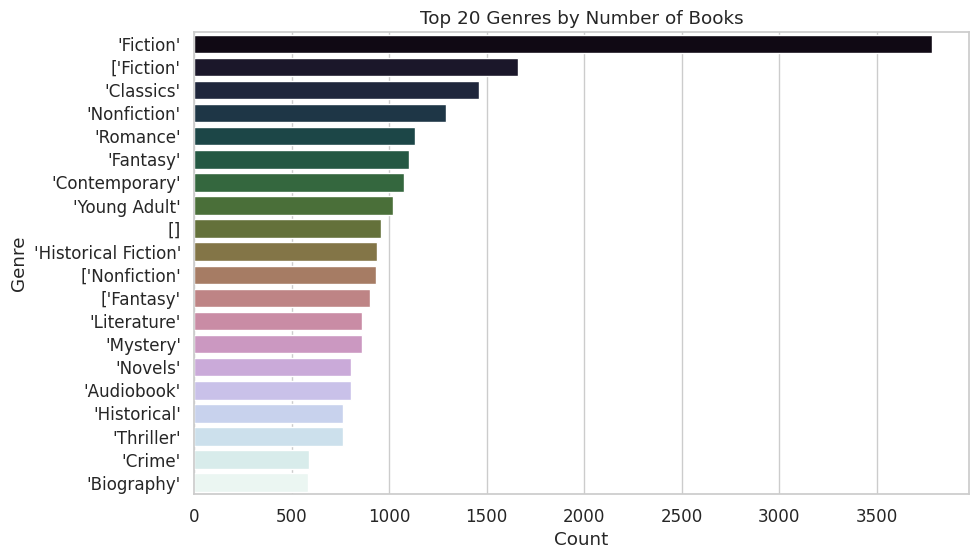

In [ ]:
# Count number of books per genre
genre_count = df_exploded['Genres'].value_counts().reset_index()
genre_count.columns = ['Genre', 'Count']

plt.figure()
sns.barplot(data=genre_count.head(20), x='Count', y='Genre', palette='cubehelix')
plt.title("Top 20 Genres by Number of Books")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


 Scatter Plot of Description Length vs. Avg_Rating

This visualization checks whether there is any relationship between how detailed a book’s description is and its average rating. Such insights may influence how we weight content features in the feature learning module.

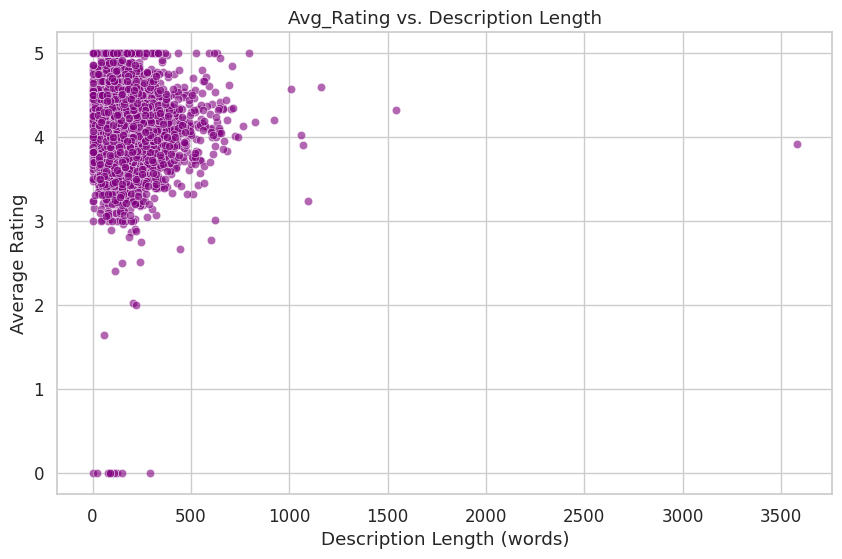

In [ ]:
plt.figure()
sns.scatterplot(x='Description_Length', y='Avg_Rating', data=df, alpha=0.6, color='purple')
plt.title("Avg_Rating vs. Description Length")
plt.xlabel("Description Length (words)")
plt.ylabel("Average Rating")
plt.show()


Distribution of Number of Genres per Book

Here, we calculate how many genres are assigned to each book. This insight can help determine whether books tend to be classified narrowly or broadly—a factor that may affect how well content features complement collaborative signals.

Understanding how many genres a book is tagged with can provide insight into the diversity of its metadata. Books with more genres might have richer semantic descriptions, potentially aiding the feature learning component of our recommendation model.

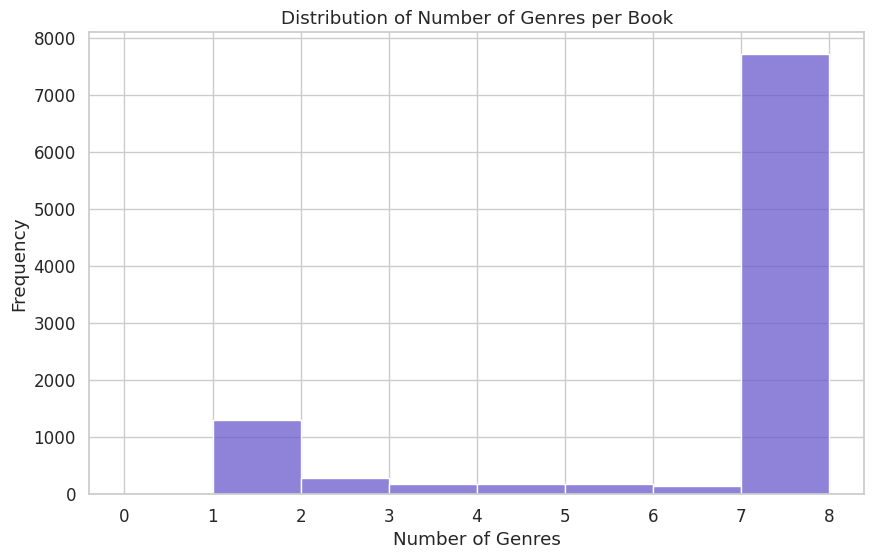

In [ ]:
# Calculate the number of genres per book
df['Num_Genres'] = df['Genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

plt.figure()
sns.histplot(df['Num_Genres'], bins=range(0, df['Num_Genres'].max()+2), color='slateblue', kde=False)
plt.title("Distribution of Number of Genres per Book")
plt.xlabel("Number of Genres")
plt.ylabel("Frequency")
plt.show()


Top 10 Most Frequent Words in Book Title

This visualization tokenizes the book titles and shows the frequency of the most common words. It complements the word cloud by providing precise counts, which can inform text-preprocessing and help in constructing title-based features.

<ipython-input-24-63e2c6651a1d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=df_top10, palette='Blues_d')


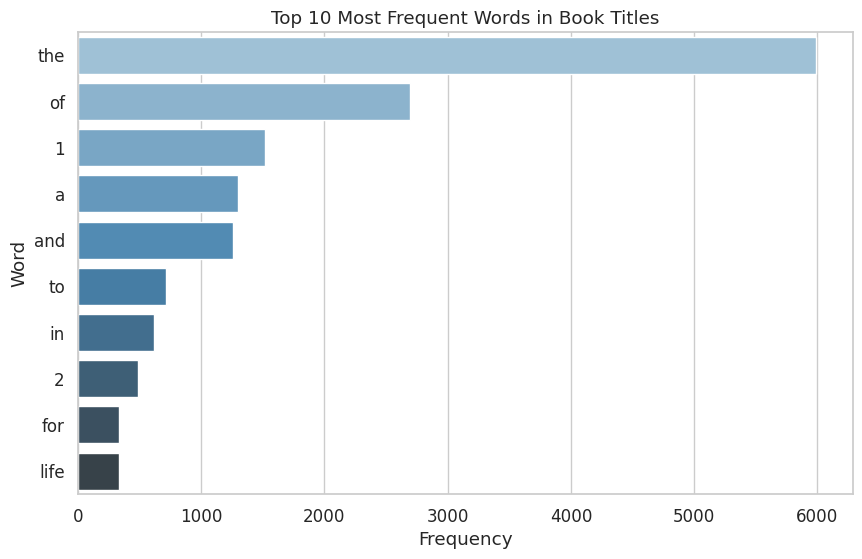

In [ ]:
import re
from collections import Counter

# Tokenize the titles: lower-case, remove punctuation, split into words
def tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

# Combine all titles and count word frequencies
all_titles = " ".join(df['Book'].astype(str))
words = tokenize(all_titles)
word_counts = Counter(words)
top10_words = word_counts.most_common(10)

# Convert to DataFrame for plotting
df_top10 = pd.DataFrame(top10_words, columns=['Word', 'Count'])

plt.figure()
sns.barplot(x='Count', y='Word', data=df_top10, palette='Blues_d')
plt.title("Top 10 Most Frequent Words in Book Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


Scatter Plot of Number of Ratings vs. Description Length

We plot the (log-transformed) number of ratings against the description length. This visualization helps determine if books with more detailed descriptions also tend to be more popular (i.e., have more ratings).

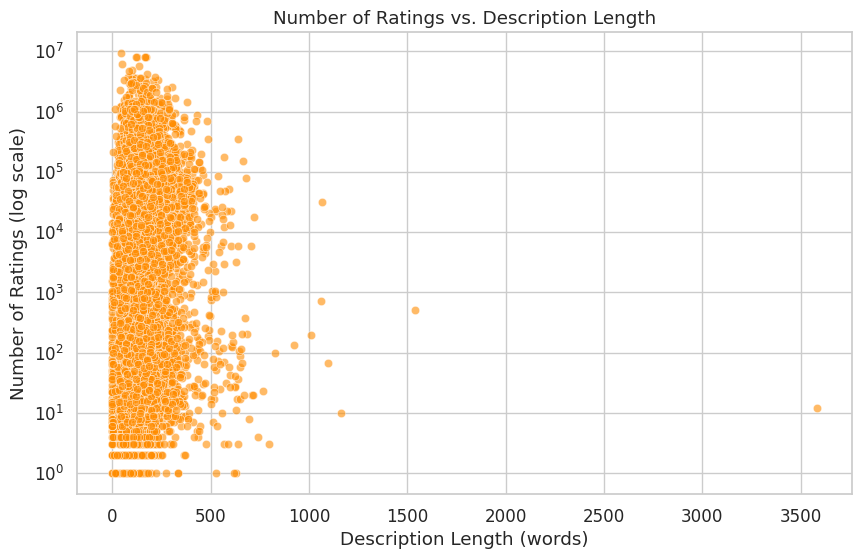

In [ ]:
plt.figure()
sns.scatterplot(x='Description_Length', y='Num_Ratings', data=df, alpha=0.6, color='darkorange')
plt.title("Number of Ratings vs. Description Length")
plt.xlabel("Description Length (words)")
plt.ylabel("Number of Ratings (log scale)")
plt.yscale('log')  # Apply log scale due to skewed ratings distribution
plt.show()


Violin Plot of Average Ratings by Dominant Genre

We extract the dominant (first listed) genre for each book and then visualize the distribution of average ratings for the top five most common genres using a violin plot. This illustrates rating distribution differences across genres.

A violin plot provides both the distribution (density) and summary statistics of average ratings for different genres. This visualization is important because it shows whether certain genres have higher or lower average ratings, which might affect how we weight content features in the recommendation model.



<ipython-input-27-8c286586058a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dominant_Genre', y='Avg_Rating', data=df_top5, palette='pastel')


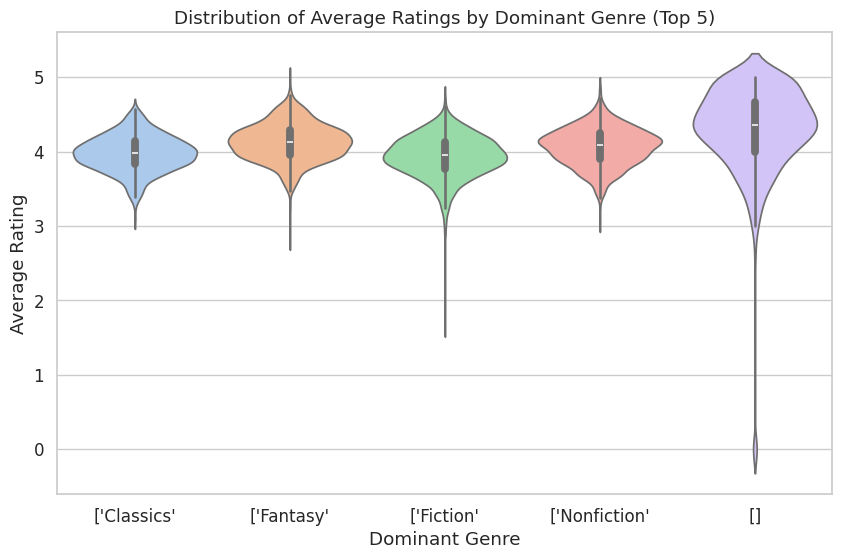

In [ ]:
# Extract the dominant genre (first genre in the comma-separated list)
df['Dominant_Genre'] = df['Genres'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) else "Unknown")

# Get the top 5 dominant genres by count
top5_genres = df['Dominant_Genre'].value_counts().head(5).index
df_top5 = df[df['Dominant_Genre'].isin(top5_genres)]

plt.figure()
sns.violinplot(x='Dominant_Genre', y='Avg_Rating', data=df_top5, palette='pastel')
plt.title("Distribution of Average Ratings by Dominant Genre (Top 5)")
plt.xlabel("Dominant Genre")
plt.ylabel("Average Rating")
plt.show()


Pair Plot of Selected Numeric Feature

We create a pair plot of the key numeric features: Avg_Rating, log-transformed Num_Ratings, Description_Length, and Title_Length. This visualization helps us inspect pairwise relationships and distributions of these features.

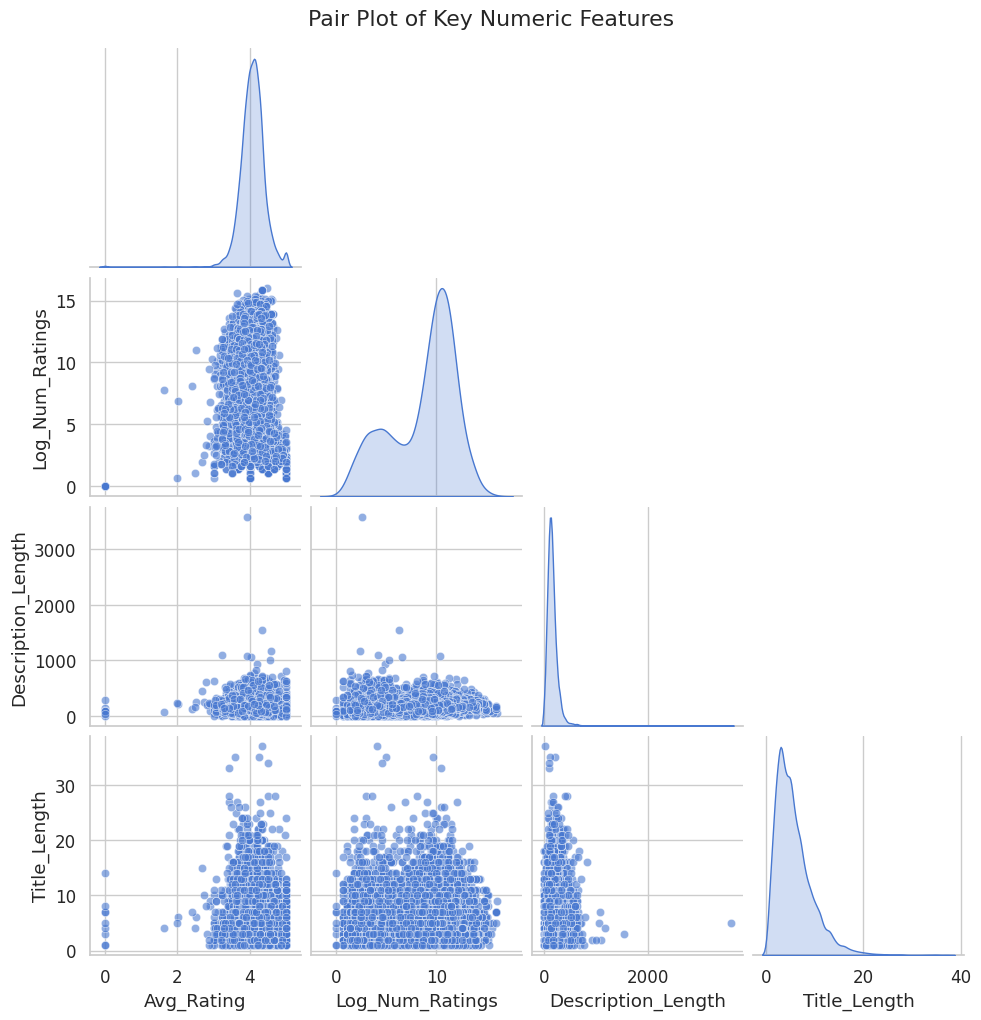

In [ ]:
# Create a new column for log-transformed Num_Ratings to mitigate skewness
df['Log_Num_Ratings'] = np.log1p(df['Num_Ratings'])

# Select features for the pair plot
pairplot_features = ['Avg_Rating', 'Log_Num_Ratings', 'Description_Length', 'Title_Length']
sns.pairplot(df[pairplot_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Key Numeric Features", y=1.02)
plt.show()


Genre Co-occurrence Matrix Heatmap
This heatmap visualizes how often different genres appear together in a single book. Understanding these co-occurrence patterns can help enhance the semantic embeddings and provide additional signals for the recommendation system.

**THE MODEL TRAINING**

The next portion of code cells is for creation of models to handle the cold start problem in book recommendations. they are to work to implement the graph based knowledge distillation and feature learning for book recommendations.

Model 1: Simple Linear Regression (MF Baseline)
It provides a baseline to compare against more sophisticated graph-based and hybrid models. For cold start items, where interaction data is sparse, content features (extracted via TF‑IDF) are especially important.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/737 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


goodreads_data.csv:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset shape: (10000, 8)
Epoch 1/30: Train Loss = 16.5381, Test Loss = 16.5728, Epoch Time = 0.13 sec, LR = 0.001
Epoch 2/30: Train Loss = 16.4902, Test Loss = 16.5249, Epoch Time = 0.01 sec, LR = 0.001
Epoch 3/30: Train Loss = 16.4423, Test Loss = 16.4770, Epoch Time = 0.00 sec, LR = 0.001
Epoch 4/30: Train Loss = 16.3945, Test Loss = 16.4291, Epoch Time = 0.00 sec, LR = 0.001
Epoch 5/30: Train Loss = 16.3468, Test Loss = 16.3814, Epoch Time = 0.00 sec, LR = 0.001
Epoch 6/30: Train Loss = 16.2991, Test Loss = 16.3337, Epoch Time = 0.00 sec, LR = 0.001
Epoch 7/30: Train Loss = 16.2516, Test Loss = 16.2861, Epoch Time = 0.00 sec, LR = 0.001
Epoch 8/30: Train Loss = 16.2041, Test Loss = 16.2386, Epoch Time = 0.00 sec, LR = 0.001
Epoch 9/30: Train Loss = 16.1567, Test Loss = 16.1912, Epoch Time = 0.00 sec, LR = 0.001
Epoch 10/30: Train Loss = 16.1094, Test Loss = 16.1439, Epoch Time = 0.00 sec, LR = 0.001
Epoch 11/30: Train Loss = 16.0621, Test Loss = 16.0967, Epoch Time = 0.00 sec, LR =

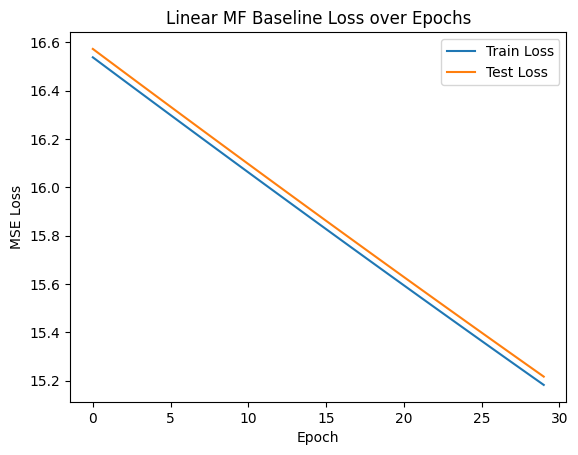

Final Test MSE: 15.216944694519043


In [ ]:
# Install required libraries if needed:
!pip install datasets scikit-learn

import pandas as pd, numpy as np, torch, torch.nn as nn, torch.optim as optim, time
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset
dataset = load_dataset("Eitanli/goodreads", split="train")
df = pd.DataFrame(dataset)
print("Dataset shape:", df.shape)

# Preprocess: Use book descriptions (convert to string) and compute TF-IDF features
df['Description'] = df['Description'].astype(str)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_features = vectorizer.fit_transform(df['Description']).toarray()
features = torch.tensor(tfidf_features, dtype=torch.float32, device=device)

# Use aggregated average rating as target (regression task)
ratings = torch.tensor(df['Avg_Rating'].values, dtype=torch.float32, device=device)

# Split indices for training and testing
indices = np.arange(len(df))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
train_idx = torch.tensor(train_idx, dtype=torch.long, device=device)
test_idx = torch.tensor(test_idx, dtype=torch.long, device=device)

# Define a simple linear regression model
class LinearMF(nn.Module):
    def __init__(self, input_dim):
        super(LinearMF, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    def forward(self, x):
        return self.linear(x).squeeze()

model1 = LinearMF(input_dim=features.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

num_epochs = 30
train_losses, test_losses, epoch_times = [], [], []

for epoch in range(num_epochs):
    start_time = time.time()
    model1.train()
    optimizer.zero_grad()
    pred = model1(features)
    loss = criterion(pred[train_idx], ratings[train_idx])
    loss.backward()
    optimizer.step()
    epoch_time = time.time() - start_time

    model1.eval()
    with torch.no_grad():
        test_loss = criterion(model1(features)[test_idx], ratings[test_idx]).item()

    train_losses.append(loss.item())
    test_losses.append(test_loss)
    epoch_times.append(epoch_time)
    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {loss.item():.4f}, Test Loss = {test_loss:.4f}, Epoch Time = {epoch_time:.2f} sec, LR = {optimizer.param_groups[0]['lr']}")

# Plot losses
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Linear MF Baseline Loss over Epochs")
plt.legend()
plt.show()

print("Final Test MSE:", test_losses[-1])
